In [1]:
from Generator import Generator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import os

In [2]:
generator = Generator()

q = generator.generate("Chirp", 4, clean=False)[0]

Generating images: 4/4 [--------------------]


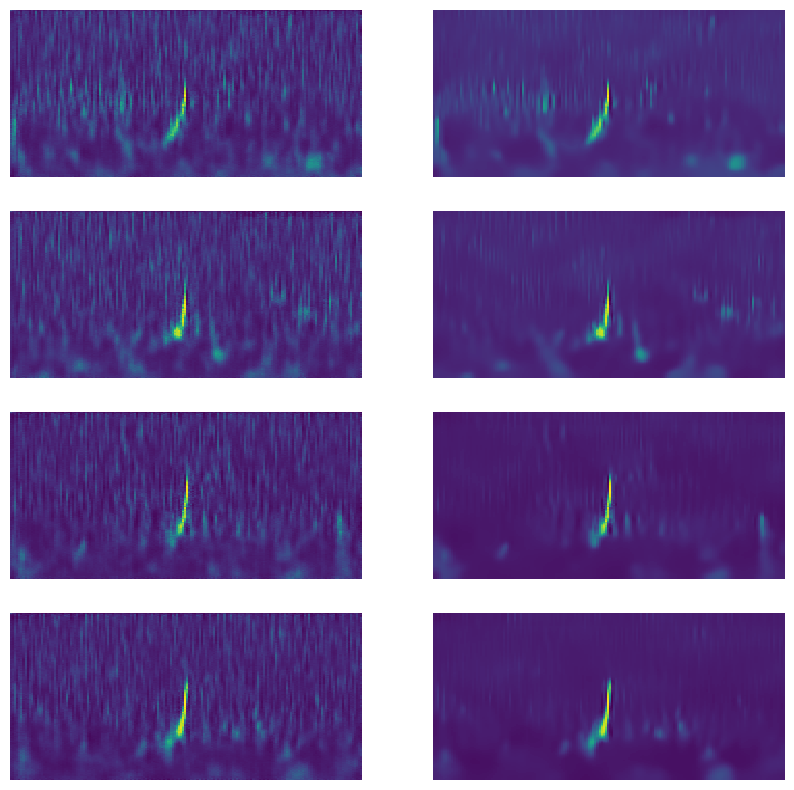

In [3]:
fig, axarr = plt.subplots(4, 2, figsize = (10, 10), sharey=True, sharex=True)

for i in range(4):
    u8 = (255 * q[i] / q[i].max()).astype(np.uint8)
    dst = cv2.fastNlMeansDenoising(u8,None,15,7,21)
    c = sns.heatmap(q[i], cmap='viridis', ax=axarr[i, 0], cbar=False)
    c.axis("off")
    d = sns.heatmap(dst, cmap='viridis', ax=axarr[i, 1], cbar=False)
    d.axis("off")

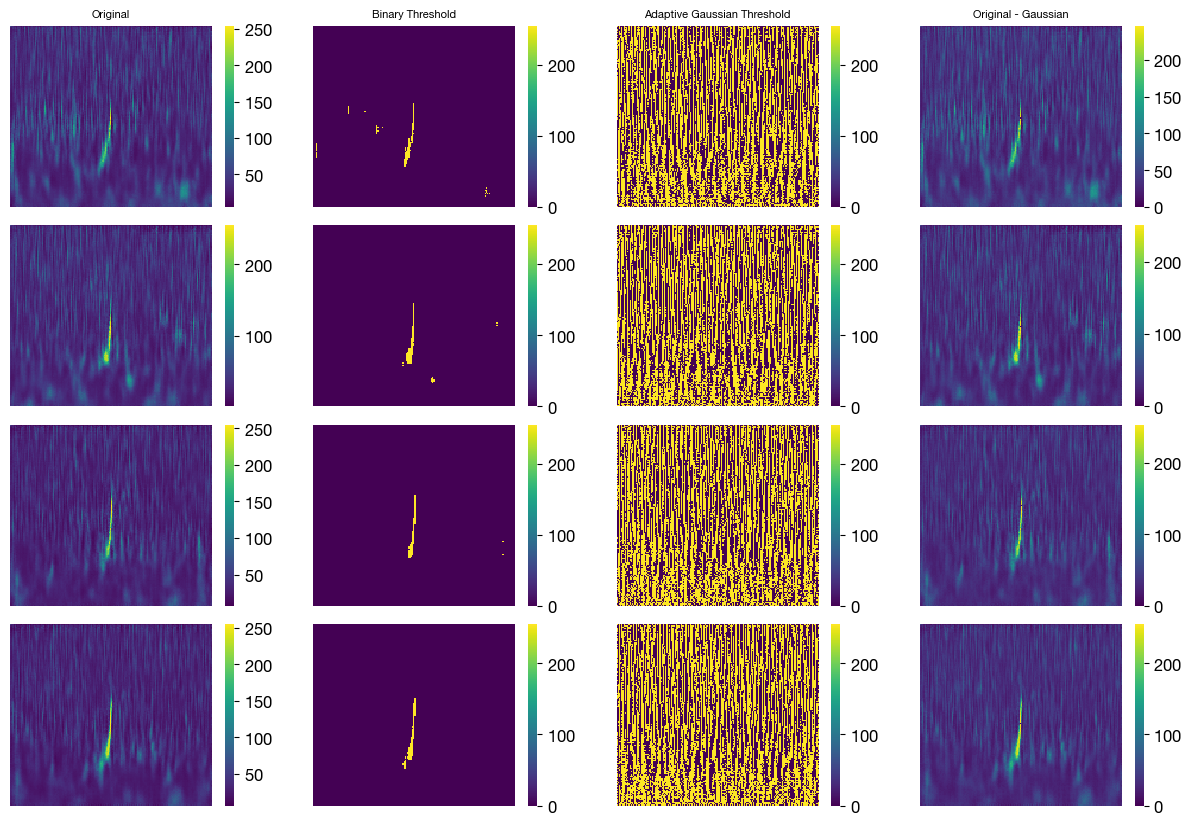

In [36]:
fig, axarr = plt.subplots(4, 4, figsize = (15, 10), sharey=True, sharex=True)
titles = ["Original", "Binary Threshold", "Adaptive Gaussian Threshold", "Original - Gaussian"]


for i in range(0, 4):
    orig = q[i]
    img = (255 * orig / orig.max()).astype(np.uint8)
    
    _,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,5,1)

    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,5,1)
    
    b = sns.heatmap(img, cmap='viridis', ax=axarr[i, 0])
    b.axis("off")

    c = sns.heatmap(th1, cmap='viridis', ax=axarr[i, 1])
    c.axis("off")

    e = sns.heatmap(th3, cmap='viridis', ax=axarr[i, 2])
    e.axis("off")

    f = sns.heatmap(img - th3, cmap='viridis', ax=axarr[i, 3])
    f.axis("off")
    
for i in range(4):
    axarr[0, i].axis("off")
    axarr[0, i].set_title(titles[i], fontweight='bold', fontsize=8)

fig.subplots_adjust(hspace=0.1, bottom=0.1)


In [ ]:
fig, axarr = plt.subplots(4, 3, figsize = (15, 10), sharey=True, sharex=True)
titles = ["Original", "Otsu's Thresholding", "Otsu's Thresholding + Gaussian Blur"]


for i in range(0, 4):
    orig = q[i]
    img = (255 * orig / orig.max()).astype(np.uint8)
    
    _,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    b = sns.heatmap(img, cmap='viridis', ax=axarr[i, 0])
    b.axis("off")

    c = sns.heatmap(th1, cmap='viridis', ax=axarr[i, 1])
    c.axis("off")

    e = sns.heatmap(th3, cmap='viridis', ax=axarr[i, 2])
    e.axis("off")

    
for i in range(3):
    axarr[0, i].axis("off")
    axarr[0, i].set_title(titles[i], fontweight='bold', fontsize=8)

fig.subplots_adjust(hspace=0.1, bottom=0.1)